# Визуализация данных

Поговорим о проекте Тинькофф Квест.
Рассматриваем следующий процесс: заявители регистрируются на сайте Тинькофф Квест, где указывают свой возраст. Всех зарегистрированных называем клиентами.

В дальнейшем кто-то из них совершает с созданного аккаунта покупки сертификатов на квест. Будем называть это утилизацией. Число дней от регистрации на сайте до первой покупки будем называть скоростью утилизации.

В приложенном файле таблица со следующими полями:

* client_id -- id клиента, зарегистрированного на сайте
* birth_dt -- дата его рождения
* reg_dttm -- дата и время регистрации на сайте данного клиента
* purchase_id -- id покупки
* purchase_dt -- дата покупки
* purchase_amt -- сумма покупки

Если данные по покупке пустые -- клиент не совершил утилизации.

## Задание 1

Постройте диаграмму (или график), которая показывает, как менялось множество клиентов по возрасту с течением времени.

In [3]:
!wget https://edu.tinkoff.ru/media/edu-files-ext-100/40efea85-f221-4233-b218-87ae35423650.xls

--2021-03-28 17:02:36--  https://edu.tinkoff.ru/media/edu-files-ext-100/40efea85-f221-4233-b218-87ae35423650.xls
Resolving edu.tinkoff.ru (edu.tinkoff.ru)... 178.248.239.60
Connecting to edu.tinkoff.ru (edu.tinkoff.ru)|178.248.239.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120187 (117K) [binary/octet-stream]
Saving to: ‘40efea85-f221-4233-b218-87ae35423650.xls’

40efea85-f221-4233- 100%[===================>] 117.37K   338KB/s    in 0.3s    

2021-03-28 17:02:37 (338 KB/s) - ‘40efea85-f221-4233-b218-87ae35423650.xls’ saved [120187/120187]



Будем ориентироваться по столбцам reg_dttm, birth_dt

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('/content/40efea85-f221-4233-b218-87ae35423650.xls')
print(df.columns.values)

['client_id' 'birth_dt' 'reg_dttm' 'purchase_id' 'purchase_dt'
 'purchase_amt']


In [27]:
df

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt
0,820519,1990-05-10,2019-01-02 12:49:39,NaN,NaT,NaN
1,820521,1970-03-23,2019-01-02 14:14:39,NaN,NaT,NaN
2,820523,1991-04-01,2019-01-02 19:51:19,1.204926e+09,2019-02-12,500.0
3,820526,1985-04-27,2019-01-02 18:09:39,NaN,NaT,NaN
4,820544,1991-05-03,2019-01-03 12:24:42,NaN,NaT,NaN
...,...,...,...,...,...,...
2372,835630,1991-01-05,2019-04-05 11:00:17,NaN,NaT,NaN
2373,835634,1991-09-06,2019-04-05 12:19:05,1.299279e+09,2019-04-07,4000.0
2374,835650,1993-09-02,2019-04-05 12:26:39,1.299387e+09,2019-04-08,1500.0
2375,835666,1998-05-15,2019-04-05 13:16:37,NaN,NaT,NaN


In [28]:
#data transformation
df['birth_dt'] = df['birth_dt'].dt.strftime('%Y')
df['reg_dttm'] = df['reg_dttm'].dt.strftime('%Y-%m')

#add new column
df['age'] = 2019 - df['birth_dt'].astype(int)
df

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt,age
0,820519,1990,2019-01,NaN,NaT,NaN,29
1,820521,1970,2019-01,NaN,NaT,NaN,49
2,820523,1991,2019-01,1.204926e+09,2019-02-12,500.0,28
3,820526,1985,2019-01,NaN,NaT,NaN,34
4,820544,1991,2019-01,NaN,NaT,NaN,28
...,...,...,...,...,...,...,...
2372,835630,1991,2019-04,NaN,NaT,NaN,28
2373,835634,1991,2019-04,1.299279e+09,2019-04-07,4000.0,28
2374,835650,1993,2019-04,1.299387e+09,2019-04-08,1500.0,26
2375,835666,1998,2019-04,NaN,NaT,NaN,21


In [32]:
#define the limits
print('min: ', df['reg_dttm'].min())
print('max: ', df['reg_dttm'].max())
print('---------------------------')
print('min: ', df['age'].min())
print('max: ', df['age'].max())

min:  2019-01
max:  2019-04
---------------------------
min:  18
max:  73


Заметим, что по факту у нас 3 временных периода: январь-февраль, февраль-март, март-апрель

In [60]:
january_data = df[df.reg_dttm == '2019-01']
february_data = df[df.reg_dttm <= '2019-02']
march_data = df[df.reg_dttm <= '2019-03']

january_data_updated = january_data.groupby(['client_id','age'], as_index=False)[['reg_dttm']].count()
january_final = january_data_updated.groupby(['age'], as_index=False)[['client_id']].count()
january_final.rename(columns={'client_id': 'count'}, inplace=True)

february_data_updated = february_data.groupby(['client_id','age'], as_index=False)[['reg_dttm']].count()
february_final = february_data_updated.groupby(['age'], as_index=False)[['client_id']].count()
february_final.rename(columns={'client_id': 'count'}, inplace=True)

march_data_updated = march_data.groupby(['client_id','age'], as_index=False)[['reg_dttm']].count()
march_final = march_data_updated.groupby(['age'], as_index=False)[['client_id']].count()
march_final.rename(columns={'client_id': 'count'}, inplace=True)

age_data = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
count_data_012 = []
count_data_023 = []
count_data_034 = []

def add_func(result, mydf):
  result.append(mydf[(mydf.age >= 18)&(mydf.age <= 25)]['count'].sum())
  result.append(mydf[(mydf.age >= 26)&(mydf.age <= 35)]['count'].sum())
  result.append(mydf[(mydf.age >= 36)&(mydf.age <= 45)]['count'].sum())
  result.append(mydf[(mydf.age >= 46)&(mydf.age <= 55)]['count'].sum())
  result.append(mydf[(mydf.age >= 56)&(mydf.age <= 65)]['count'].sum())
  result.append(mydf[(mydf.age > 65)]['count'].sum())
  return result

count_data_012 = add_func(count_data_012, january_final)
info = pd.DataFrame({'Age': age_data, 'clients num. January': count_data_012})
count_data_023 = add_func(count_data_023, february_final)
info['clients num. February'] = count_data_023

count_data_034 = add_func(count_data_034, march_final)
info['clients num. March'] = count_data_034
info

,Age,clients num. January
0,18-25,234
1,26-35,198
2,36-45,101
3,46-55,45
4,56-65,21
5,66+,2


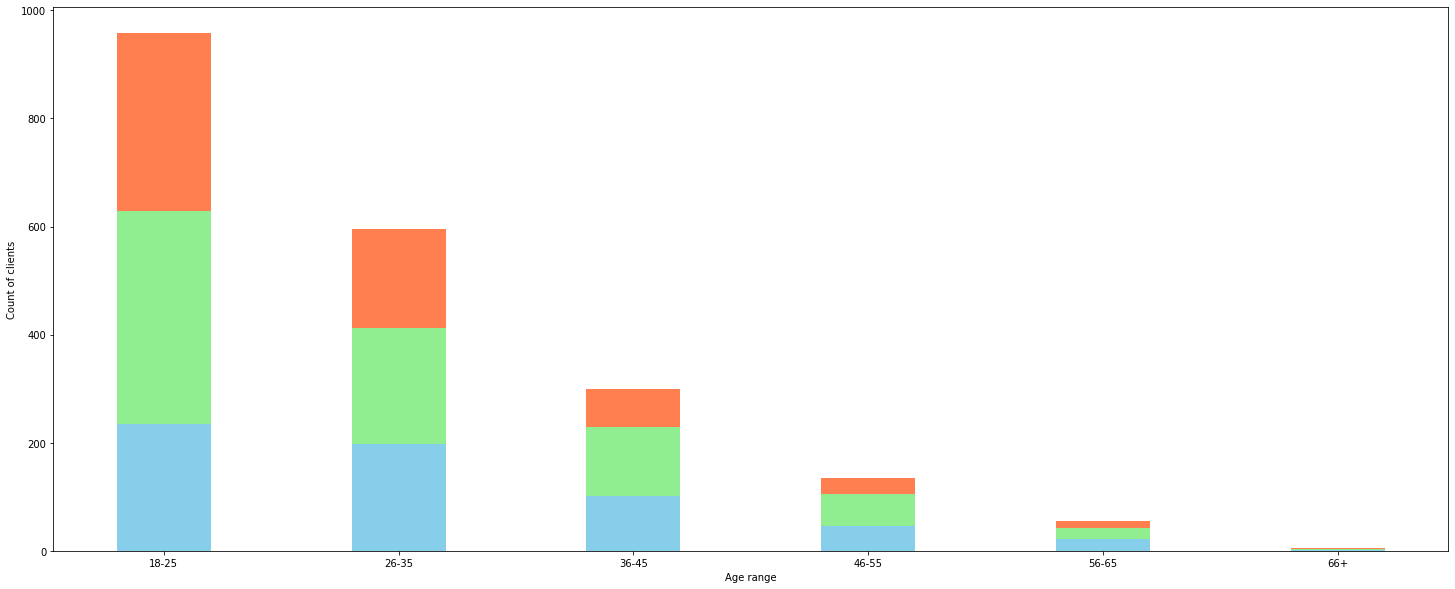

In [82]:
plt.figure(figsize = (25,10))
plt.xlabel('Age range')
plt.ylabel('Count of clients')

plt.bar(info['Age'] , info['clients num. March'], color = 'coral', label = 'March', width=0.4, align='center')
plt.bar(info['Age'] , info['clients num. February'], color = 'lightgreen', label = 'February', width=0.4, align='center')
plt.bar(info['Age'] , info['clients num. January'], color = 'skyblue', label = 'January', width=0.4, align='center')
plt.savefig('task1.png', dpi = 100)
plt.show()

<Figure size 432x288 with 0 Axes>